# 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [61]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.05, random_state=0
)

X = StandardScaler().fit_transform(X)

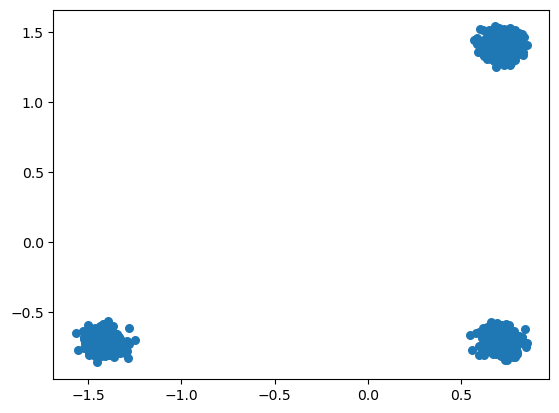

In [62]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=30)

# 2. Jalankan DBSCAN dengan `eps=0.2`, `min_samples=5`, hitung jumlah klaster & noise.

In [63]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 0


# 3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [64]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.956


# 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

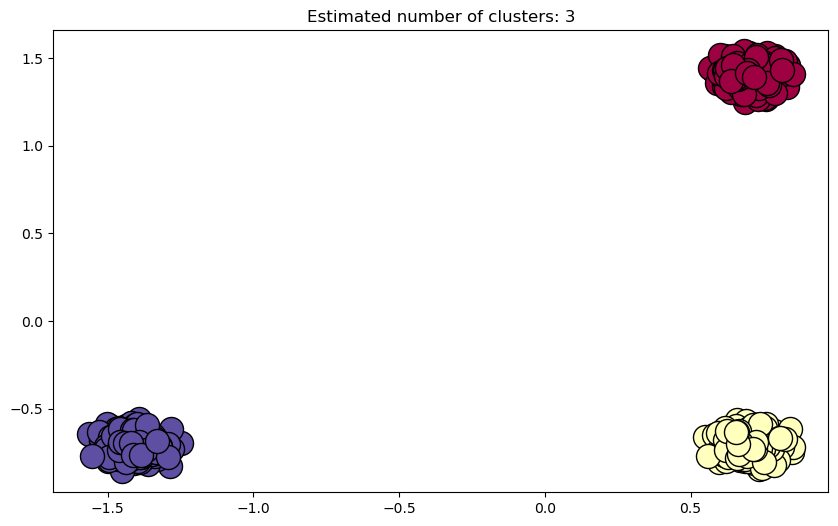

In [65]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], 
               s=300, 
               c=[col], 
               marker='o',
               edgecolors='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], 
               s=50,
               c=[col],
               marker='o',
               edgecolors='k')

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

# 5. Lakukan eksperimen: 
- `eps` = 0.05, 0.1, 0.3, 0.5
- `min_samples` = 3, 10, 20
- Catat perubahan klaster, noise, dan kualitas evaluasi.

## Menggunakan `eps` = 0.05 dan `min_samples` = 3

![Code](../image/eksp1_1.png) <br>
![Code](../image/eksp1_2.png) <br>
![Code](../image/eksp1_3.png)

## Menggunakan `eps` = 0.05 dan `min_samples` = 10

![Code](../image/eksp2_1.png) <br>
![Code](../image/eksp2_2.png) <br>
![Code](../image/eksp2_3.png)

## Menggunakan `eps` = 0.05 dan `min_samples` = 20

![Code](../image/eksp3_1.png) <br>
![Code](../image/eksp3_2.png) <br>
![Code](../image/eksp3_3.png)

## Menggunakan `eps` = 0.1 dan `min_samples` = 3

![Code](../image/eksp4_1.png) <br>
![Code](../image/eksp4_2.png) <br>
![Code](../image/eksp4_3.png)

## Menggunakan `eps` = 0.1 dan `min_samples` = 10

![Code](../image/eksp5_1.png) <br>
![Code](../image/eksp5_2.png) <br>
![Code](../image/eksp5_3.png)

## Menggunakan `eps` = 0.1 dan `min_samples` = 20

![Code](../image/eksp5_1.png) <br>
![Code](../image/eksp6_2.png) <br>
![Code](../image/eksp6_3.png)

## Menggunakan `eps` = 0.3 dengan `min_samples` = 3, 10, 20 dan `eps` = 0.5 dengan `min_samples` = 3, 10, 20

↳ Hasil akan sama baiknya dengan sebelumnya, dikarenakan data telah memiliki struktur kepadatan yang dominan. Rentang parameter (`eps` dan `min_samples`) yang optimal untuk mendeteksi pola kepadatan dalam data telah ditemukan.